In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

# GATHERING

##### twitter archive data

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### image predictions 

#`image_predictions.tsv` is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response #if 200 is returned the the request has been successful

<Response [200]>

In [4]:
import os

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open (os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
#upload the image-predictions data
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')


##### tweet json

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [22]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [23]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [24]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [27]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [6]:
json_data = r'tweet_json.txt'
df_list = []
with open(json_data, 'r') as json_data:
    for line in json_data:
        data = json.loads(line)
        tweet_id = data['id']
        favourite_count = data['favorite_count']
        retweet_count = data['retweet_count']
    
        df_list.append({'tweet_id': tweet_id,
                        'favourite_count': favourite_count,
                        'retweet_count': retweet_count})
    
#creating the dataframe for the additiona info
additional_info = pd.DataFrame(df_list, columns=['tweet_id','favourite_count', 'retweet_count'])
additional_info.head()

,tweet_id,favourite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### *twitter_archive Visual assessment*

In [7]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1227,713909862279876608,NaN,NaN,2016-03-27 02:05:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Doug. His nose is legendary af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/iDWlapaXWmm,12,10,Doug,None,None,None,None
355,830956169170665475,NaN,NaN,2017-02-13 01:46:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Reggie. He hates puns. 12/10 ligh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/830956169...,12,10,Reggie,None,None,None,None
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's out here bustin h*ckin gh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302...,13,10,Tucker,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
985,749075273010798592,NaN,NaN,2016-07-02 03:00:36 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Boomer. He's self-baptizing. Other dog...,NaN,NaN,NaN,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
1276,709158332880297985,NaN,NaN,2016-03-13 23:24:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rodney. He's a Ukranian Boomchicka. Outsi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709158332...,10,10,Rodney,None,None,None,None


- source column has html tags
- there are both replies and retweetes in the data. we just need the original ratings
- text column has link at the end. in some cases the link is corrupted
- timestamp / retweeted_status_timestamp columns have both date and time
- dog stages are in differents columns

###  *twitter archive programmatic assessment*

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- wrong data type for `tweet_id` in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp


In [10]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
twitter_archive[twitter_archive['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


In [12]:
twitter_archive[twitter_archive.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [13]:
twitter_archive.loc[twitter_archive['expanded_urls'] == 'https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [14]:
twitter_archive.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

In [15]:
twitter_archive.expanded_urls.value_counts().sample(10)

https://twitter.com/dog_rates/status/720059472081784833/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/683142553609318400/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/670452855871037440/photo/1                                                                                                                                                                                                    1
https://twitter.com/sebscat/status/788818328538099712                                                                                                                                                                    

In [16]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
twitter_archive[twitter_archive['name'] == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [18]:
twitter_archive.duplicated().sum()

0

- there are 137 duplicated entries for expanded urls. 
- we also have urls in the source column that are not twitter i.e from vine 
- in some cases, the urls have been entered more than once in the expanded_urls column
- wrong urls in the expanded_urls column
- the rating denominator is not 10 for all entries
- name 'a' repeated in the name column

### *image_predictions Visual assessment*

In [19]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


- wrong labelling in the predictions e.g banana, paper towel

### *image_predictions programmatic assessment*

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [22]:
image_predictions.loc[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.07713,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.07713,False


In [23]:
image_predictions.loc[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True


In [24]:
image_predictions.iloc[1297].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg'

- Duplicated jpg_url entries. the tweet Ids are unique though

In [25]:
image_predictions.p1.value_counts().sample(10)

Boston_bull         9
cocker_spaniel     30
alp                 1
African_grey        1
tiger_shark         1
espresso            1
lawn_mower          1
cliff               1
Shih-Tzu           17
jack-o'-lantern     3
Name: p1, dtype: int64

In [26]:
image_predictions.p2.value_counts().sample(10)

schipperke      8
canoe           1
sports_car      2
snowmobile      1
tarantula       1
sunglass        1
tree_frog       1
grey_whale      1
basketball      1
groenendael    10
Name: p2, dtype: int64

- Inaccurate p1,p2,p3 predictions e.g banana, paper towel, coral_reef

### *additional_info Visual assessment*

In [27]:
additional_info.sample(10)

,tweet_id,favourite_count,retweet_count
2111,670434127938719744,1501,708
2204,668631377374486528,763,349
966,750147208377409536,3409,1095
1986,672834301050937345,1398,623
1190,717790033953034240,3170,1272
1518,690728923253055490,2384,597
1983,672898206762672129,944,459
694,786709082849828864,20296,7069
503,813051746834595840,23337,8503
213,851464819735769094,25944,7855


In [28]:
additional_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   favourite_count  2354 non-null   int64
 2   retweet_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
additional_info.iloc[888]

tweet_id           759566828574212096
favourite_count                     0
retweet_count                   24319
Name: 888, dtype: int64

- some entries have a high retweet count but 0 favourite count. 

### Quality issues
1. twitter_archive- source column has html tags

2. twitter_archive- includes retweets and replies to tweets

3. twitter_archive- wrong data source in the `source` column.

4. twitter_archive - wrong data type for `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

5. twitter_archive - `name` has repeated name 'a'

6. twitter_archive - extract these ratings by taking the ratio of numerator and denominator 

7. twitter_archive - for the expanded_urls column, some of the urls have been entered more than once

8. DECIMAL DOG RATINGS wrong entries where there are decimals in the rating

### Tidiness issues
1. twitter_archive - dog stages are in differents columns. we have dogs in multiple stages

2. merging the three data sets into one

# CLEANING

In [114]:
twitter_archive_copy = twitter_archive.copy()
additional_info_copy = additional_info.copy()
image_predictions_copy = image_predictions.copy()

### twitter_archive- includes retweets and replies to tweets

##### Define 

- Remove the retweets and replies to tweets rows from the data
- drop the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns,in_reply_to_status_id, in_reply_to_user_id
https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

##### Code 

In [115]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_id.isnull() 
                                            & twitter_archive_copy.in_reply_to_status_id.isnull()]
twitter_archive_copy = twitter_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                                                  'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'],
                                                 axis = 1)

##### Test 

In [116]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### twitter_archive - wrong data type for `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

##### Define 

- Convert the `tweet_id` into string
- change the data type timestamp to str and datetime. we have already dropped `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`

##### Code 

In [117]:
# To string
twitter_archive_copy.tweet_id = twitter_archive_copy.tweet_id.astype(str)
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)
additional_info_copy.tweet_id = additional_info_copy.tweet_id.astype(str)

# To datetime
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy.timestamp)

##### Test 

In [119]:
twitter_archive_copy.tweet_id.dtype

dtype('O')

In [120]:
image_predictions_copy.tweet_id.dtype

dtype('O')

In [121]:
additional_info_copy.tweet_id.dtype

dtype('O')

In [122]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### twitter_archive- source column has html tags

##### Define 

- remove the html tags from the urls

##### Code 

In [123]:
twitter_archive_copy.source = twitter_archive_copy.source.str.split('"').str[1]  

#reference https://researchdatapod.com/how-to-solve-python-attributeerror-series-object-has-no-attribute-split/

##### Test 

In [124]:
twitter_archive_copy.source.value_counts()

http://twitter.com/download/iphone              1964
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

### twitter_archive- wrong data source in the `source` column.

##### Define 

- remove the data whose urls is http://vine.co  i.e not from twitter using regex

reference: https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/

##### Code 

In [125]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.source.str.match('http://vine.co') ==False]

##### Test 

In [126]:
twitter_archive_copy.source.value_counts()

http://twitter.com/download/iphone              1964
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

### DECIMAL DOG RATINGS. wrong entries where there are decimals in the rating

##### Define 

- Correct the values with the correct rating in the text column

##### Code 

In [127]:
#Extract the columns with decimal rating
twitter_archive_copy[twitter_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\bmbaabu\AppData\Local\Temp\ipykernel_11644\2764300471.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_copy[twitter_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [133]:
#get the correct rating
twitter_archive_copy.loc[45,'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [134]:
#get the correct rating
twitter_archive_copy.loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [135]:
#get the correct rating
twitter_archive_copy.loc[763,'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [136]:
#get the correct rating
twitter_archive_copy.loc[1712,'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [137]:
#replace the numerator with the correct values
twitter_archive_copy.loc[45,'rating_numerator'] = 13.5
twitter_archive_copy.loc[695,'rating_numerator'] = 9.75
twitter_archive_copy.loc[763,'rating_numerator'] = 11.27
twitter_archive_copy.loc[1712,'rating_numerator'] = 11.26

##### Test 

In [139]:
twitter_archive_copy.loc[45,'rating_numerator']

13.5

In [138]:
twitter_archive_copy.loc[1712,'rating_numerator']

11.26

### twitter_archive - extract the ratings by taking the ratio of numerator and denominator 

##### Define 

- Calculate the rating by taking the ratio of numerator and denominator


##### Code 

In [140]:
twitter_archive_copy['rating'] = twitter_archive_copy.rating_numerator/twitter_archive_copy.rating_denominator

##### Test 

In [141]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2006 non-null   object             
 1   timestamp           2006 non-null   datetime64[ns, UTC]
 2   source              2006 non-null   object             
 3   text                2006 non-null   object             
 4   expanded_urls       2003 non-null   object             
 5   rating_numerator    2006 non-null   float64            
 6   rating_denominator  2006 non-null   int64              
 7   name                2006 non-null   object             
 8   doggo               2006 non-null   object             
 9   floofer             2006 non-null   object             
 10  pupper              2006 non-null   object             
 11  puppo               2006 non-null   object             
 12  rating              2006 non-null 

### twitter_archive - `name` has repeated name 'a'

##### Define 

- replace a with NaN


##### Code 

In [142]:
twitter_archive_copy['name'] = twitter_archive_copy.name.replace('a', np.nan)

##### Test 

In [143]:
twitter_archive_copy[twitter_archive_copy['name']=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


### twitter_archive - for the expanded_urls column, some of the urls have been entered more than once

##### Define 

- split the url using the commas and take the first url

##### Code 

In [144]:
twitter_archive_copy['expanded_urls'] = twitter_archive_copy.expanded_urls.str.split(',', expand=True)[0]


##### Test 

In [145]:
#test a few of the twwet_ids that had more that one entry seen in the assessment
twitter_archive_copy[twitter_archive_copy['tweet_id'] == '716802964044845056'].expanded_urls.tolist()

['https://twitter.com/dog_rates/status/716802964044845056/photo/1']

## Tidiness

### twitter_archive - dog stages are in differents columns // Multiple dog stages

##### Define 

- merge the columns name into one using string concatenation
- the are dogs in multiple stages

Reference: https://www.pythontutorial.net/python-string-methods/python-string-concatenation/

##### Code 

In [161]:
# handle none
twitter_archive_copy.doggo.replace('None', '', inplace=True)
twitter_archive_copy.floofer.replace('None', '', inplace=True)
twitter_archive_copy.pupper.replace('None', '', inplace=True)
twitter_archive_copy.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_copy['dog_stage'] = twitter_archive_copy.doggo + twitter_archive_copy.floofer + twitter_archive_copy.pupper + twitter_archive_copy.puppo

# handle multiple stages
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_copy.loc[twitter_archive_copy.dog_stage == '', 'dog_stage'] = np.nan

#drop the doggo, floofer,pupper & puppo columns
twitter_archive_copy = twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test 

In [162]:
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,1.2,NaN


In [163]:
twitter_archive_copy.dog_stage.value_counts()

pupper            205
doggo              66
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

## Merging the cleaned data

In [164]:
#merge the data using merge, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
twitter_archive_copy= twitter_archive_copy.merge(additional_info_copy,how='inner', on=['tweet_id'])
twitter_archive_copy= twitter_archive_copy.merge(image_predictions_copy, how='inner', on=['tweet_id'])
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,1.3,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,1.3,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,1.2,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,1.3,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,1.2,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [165]:
twitter_archive_copy.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [3]:
# importing the master dataset
df = pd.read_csv('twitter_archive_master.csv')
df['rating'].value_counts(normalize=True)


1.200000      0.228311
1.000000      0.212582
1.100000      0.201421
1.300000      0.128361
0.900000      0.076104
0.800000      0.048199
0.700000      0.025875
0.500000      0.016743
1.400000      0.016743
0.600000      0.016235
0.300000      0.009640
0.400000      0.007610
0.200000      0.005074
0.100000      0.002029
1.127000      0.000507
0.975000      0.000507
3.428571      0.000507
0.000000      0.000507
1.350000      0.000507
177.600000    0.000507
0.818182      0.000507
0.636364      0.000507
1.126000      0.000507
42.000000     0.000507
Name: rating, dtype: float64

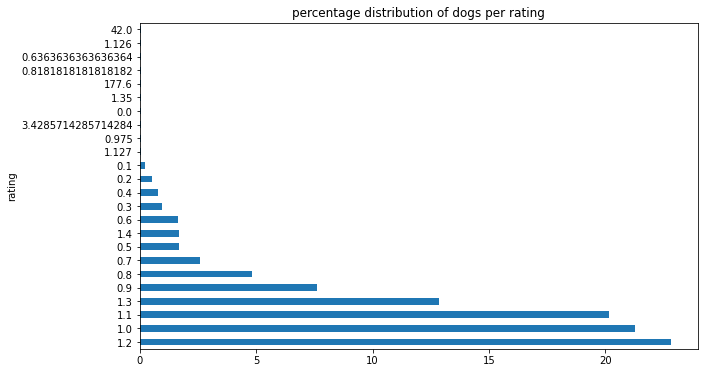

In [34]:
prop = df['rating'].value_counts(normalize=True) *100

prop.plot.barh(xlabel='rating', ylabel='percentage', title= 'percentage distribution of dogs per rating', figsize=(10,6));

In [9]:
df.groupby(['p1_dog'])[['p1_conf','rating']].mean()

,p1_conf,rating
p1_dog,,
False,0.535562,1.375859
True,0.615043,1.091883


In [10]:
df.groupby(['dog_stage'])['rating'].mean()

dog_stage
doggo             1.188889
doggo, floofer    1.100000
doggo, pupper     1.100000
doggo, puppo      1.300000
floofer           1.200000
pupper            1.063816
puppo             1.200000
Name: rating, dtype: float64

In [11]:
#creating a data frame with valid dog stages, reference: https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/
stages = ['doggo','floofer','pupper','puppo']
df_stages = df[df['dog_stage'].isin(stages)] 
df_stages.groupby(['dog_stage'])['rating'].mean()

dog_stage
doggo      1.188889
floofer    1.200000
pupper     1.063816
puppo      1.200000
Name: rating, dtype: float64

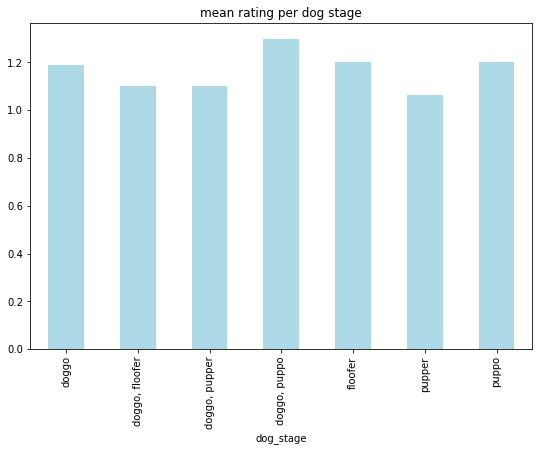

In [37]:
df.groupby(['dog_stage'])['rating'].mean().plot.bar(title= 'mean rating per dog stage', color='lightblue', figsize =(9,6));

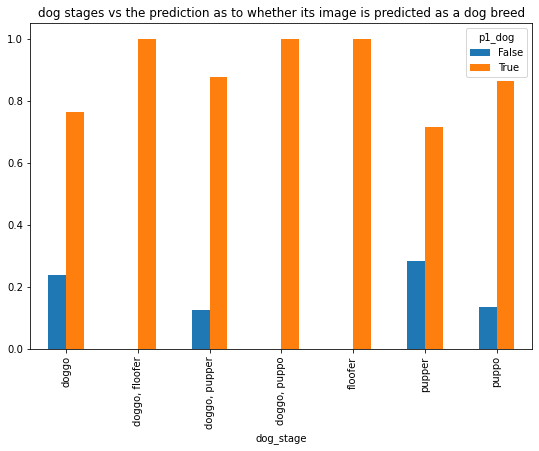

In [39]:
#grouping the dog stages vs the prediction as to whether its image is predicted as a dog breed
df.groupby(['dog_stage'])['p1_dog'].value_counts(normalize=True).unstack().plot(
    kind='bar', title= 'dog stages vs the prediction as to whether its image is predicted as a dog breed', figsize =(9,6));

### Insights:
1. majority of the dogs received a rating of 1.2. 

2. dogs adjugrd to be in doggo, puppo stage had the highest mean rating- 1.3

3. 70 % or more of the prediction correctly yielded a dog breed for dogs in all stages

### Visualization

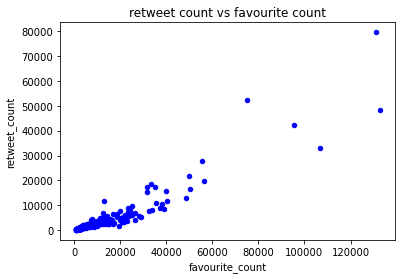

In [16]:
#creating a scatter plot to see the relation betweeen the retweeet and favourite count
%matplotlib inline

df_stages.plot.scatter(x='favourite_count', y='retweet_count', c='blue', 
                                  title='retweet count vs favourite count');

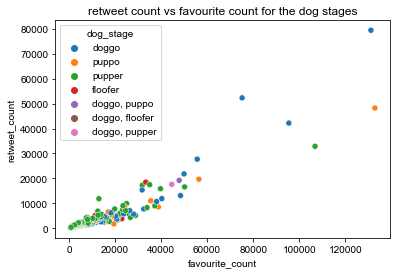

In [40]:
#using seaborn to get more nuance
import seaborn as sns
sns.scatterplot(x='favourite_count', y='retweet_count', data=df, hue='dog_stage').set(
    title='retweet count vs favourite count for the dog stages');
sns.set(rc = {'figure.figsize':(20,10)})
#https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
#https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
#https://www.statology.org/seaborn-title/